<a href="https://colab.research.google.com/github/Jovin-Joy4121/AI-ML-ELEVATE-TASK-DAY-7/blob/main/breast%20cancer%20svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving breast-cancer.csv to breast-cancer.csv


/tmp/ipython-input-1-2425661962.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)


Linear Kernel Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time

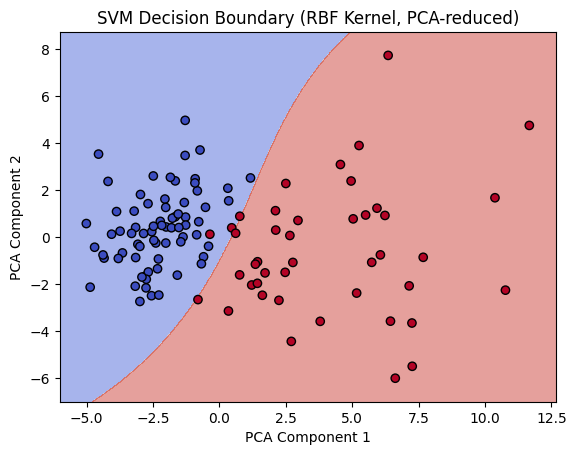

In [1]:
# SVM Classification - Task 7

# =============================
# Step 1: Upload and Load Data
# =============================

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Assuming uploaded file is a CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
df.head()

# =============================
# Step 2: Preprocessing
# =============================

# Drop ID column if exists
if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)

# Replace labels if needed
df.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)

# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =============================
# Step 3: Train SVM (Linear & RBF)
# =============================

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Performance:")
print(classification_report(y_test, y_pred_linear))

# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Performance:")
print(classification_report(y_test, y_pred_rbf))

# =============================
# Step 4: Hyperparameter Tuning
# =============================

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Estimator Performance:")
print(classification_report(y_test, grid.predict(X_test)))

# =============================
# Step 5: 2D Visualization
# =============================

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_2D = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model_2D.fit(X_train_2D, y_train_2D)

# Plotting decision boundary
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_decision_boundary(model_2D, X_test_2D, y_test_2D, "SVM Decision Boundary (RBF Kernel, PCA-reduced)")

# =============================
# Done!
# =============================

